In [1]:
import torch

In [2]:
x = torch.tensor([5,3])
y = torch.tensor([2,1])

In [3]:
print(x*y)

tensor([10,  3])


In [4]:
x = torch.zeros([2,5])

In [5]:
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [6]:
x.shape

torch.Size([2, 5])

In [7]:
y = torch.rand([2,5])

In [8]:
print(y)

tensor([[0.8683, 0.2619, 0.8955, 0.5000, 0.2895],
        [0.8198, 0.5414, 0.1556, 0.5667, 0.0264]])


In [9]:
y.view([1,10])

tensor([[0.8683, 0.2619, 0.8955, 0.5000, 0.2895, 0.8198, 0.5414, 0.1556, 0.5667,
         0.0264]])

In [10]:
print(y)

tensor([[0.8683, 0.2619, 0.8955, 0.5000, 0.2895],
        [0.8198, 0.5414, 0.1556, 0.5667, 0.0264]])


In [11]:
y = y.view([1,10])

In [12]:
print(y)

tensor([[0.8683, 0.2619, 0.8955, 0.5000, 0.2895, 0.8198, 0.5414, 0.1556, 0.5667,
         0.0264]])


In [13]:
# simple mathmematics with array

In [14]:
import torch
import torchvision
from torchvision import transforms, datasets

In [15]:
# most time will be use in prepping data
# Batching
train = datasets.MNIST("data/", train = True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

# STOP finding higher curve learning content, just keep practice
# Tedious work to iterate over data
# for validation, we need out of sample data. Cause machine will keep overfitting
# on in-sample data

# Open parenthesis is for where you want your data to go, for going locally, nothing to specify
test = datasets.MNIST("data/", train = False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))


In [16]:
# feeding 10 at a time, base 8 number for higher batch size, hoping this data will generalize
# Batching helps regulariztion
trainset = torch.utils.data.DataLoader(train, batch_size =10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size =10, shuffle = True)

In [17]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [18]:
# the last temporary variable in for loop can still be accessible
x, y = data[0][0], data[1][0]
print(y)

tensor(0)


In [19]:
import matplotlib.pyplot as plt

In [20]:
print(data[0][0].shape)
#shaping stuff is important, there is unnecessary 1 at the start for right dimensionality

torch.Size([1, 28, 28])


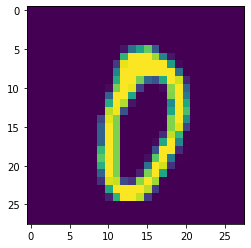

In [21]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [22]:
# models will just try top decrease loss
# always check for balancing dataset
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [23]:
for data in trainset:
    Xs, ys =data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [24]:
for i in counter_dict:
    print(f"{i}:{counter_dict[i]/ total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [25]:
import torch.nn as nn
import torch.nn.functional as F

In [26]:
# If you want the init method of your inherited class to run use super init
# calling paste as pasta
input = 28 * 28
output = 64     # hidden layer ouput
final_output = 10

class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # forgetting super.__init__ will lead to attribute error
        #fc1 is fully connected
        self.fc1 = nn.Linear(input, output)
        self.fc2 = nn.Linear(output, output)
        self.fc3 = nn.Linear(output, output)
        self.fc4 = nn.Linear(output, final_output)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))  #helper function of pytorch
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim =1) # dim is almost same as axes dim = 0 might means distributing across batch
    
        # you can do fancy things here apart from other libraries, throw logic in here, really advance models, here with pytorch it's really simple and autograd is a boon
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [27]:
# Multi-class distribution we require probability, here we use log softmax
X = torch.rand([28,28])
X = X.view(-1 or 0, 28*28) #flatten
# -1 : meaning it's of any size adding array
# you have to format things exactly how these library exactly want it to be

In [28]:
output = net(X)

In [29]:
output

tensor([[-2.2814, -2.3366, -2.4560, -2.2617, -2.2289, -2.4409, -2.2259, -2.2929,
         -2.2014, -2.3337]], grad_fn=<LogSoftmaxBackward>)

In [30]:
j = torch.rand([3,3])

In [31]:
j

tensor([[0.6493, 0.4570, 0.6371],
        [0.5427, 0.6918, 0.6004],
        [0.1213, 0.2206, 0.3495]])

In [32]:
j.view(3*3)

tensor([0.6493, 0.4570, 0.6371, 0.5427, 0.6918, 0.6004, 0.1213, 0.2206, 0.3495])

In [33]:
j.view(1,3*3)

tensor([[0.6493, 0.4570, 0.6371, 0.5427, 0.6918, 0.6004, 0.1213, 0.2206, 0.3495]])

In [34]:
j.view(-1,3*3)

tensor([[0.6493, 0.4570, 0.6371, 0.5427, 0.6918, 0.6004, 0.1213, 0.2206, 0.3495]])

In [35]:
for data in trainset

tensor([[0.6493, 0.4570, 0.6371],
        [0.5427, 0.6918, 0.6004],
        [0.1213, 0.2206, 0.3495]])

In [44]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001) #1e-3 lr says the step taken by optimizer
# maybe overfitting is the reason why we don't need 100

# net.parameters means it will take anything that is adjustable in our model
# a full pass through data is called an epoch
epochs = 3

for epoch in range(epochs):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28 * 28)) # input of flattened data image pixels
        loss = F.nll_loss(output, y)
        loss.backward() #backprop
        optimizer.step()
    print(loss) 

tensor(0.2041, grad_fn=<NllLossBackward>)
tensor(0.0093, grad_fn=<NllLossBackward>)
tensor(0.0056, grad_fn=<NllLossBackward>)


In [46]:
correct = 0
total = 0

with torch.no_grad(): # we don't want any sort of gradient calculation in background rn
    # torch will continously keep taking grad
    # historically there was net.train()...... and net.eval 
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28 * 28))
        for idx, i in enumerate(output): # enumerate gives out counter and value from a list
            if torch.argmax(i) == y[idx]: #torch.argmax returns the index of maximum value
                correct +=1
            total +=1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.977


In [47]:
# it's really easy to sneak in the data leakage
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

<function matplotlib.pyplot.show(*args, **kw)>

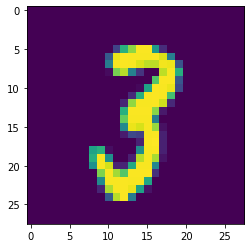

In [55]:
import matplotlib.pyplot as plt
plt.imshow(X[7].view(28,28))
plt.show

In [56]:
print(torch.argmax(net(X[7].view(-1,28*28))[0]))

tensor(3, grad_fn=<NotImplemented>)


In [ ]:
# convolution NN working almost better at series dat than 
# Ignite package for pytorch